In [1]:
import scipy.io as sio
from scipy import fftpack as fft
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
H__sample_rx_fu = np.load('./data/train/H__sample_rx_fu.npy')
H_noisy__sample_rx_fu = np.load('./data/train/H_noisy__sample_rx_fu.npy')

In [8]:
sample_index = np.random.randint(H__sample_rx_fu.shape[0])

channel__rx_fu = H__sample_rx_fu[sample_index]
channel__beam_fu = fft.idct(channel__rx_fu, axis=0)
channel__beam_delay = fft.idct(channel__beam_fu, axis=1)

noisy_channel__rx_fu = H_noisy__sample_rx_fu[sample_index]
noisy_channel__beam_fu = fft.idct(noisy_channel__rx_fu, axis=0)
noisy_channel__beam_delay = fft.idct(noisy_channel__beam_fu, axis=1)

beams = np.arange(0, channel__beam_fu.shape[0] + 1, 1)
delays = np.arange(0, channel__beam_fu.shape[1] + 1, 1)

(33, 51) (33, 51) (32, 50)


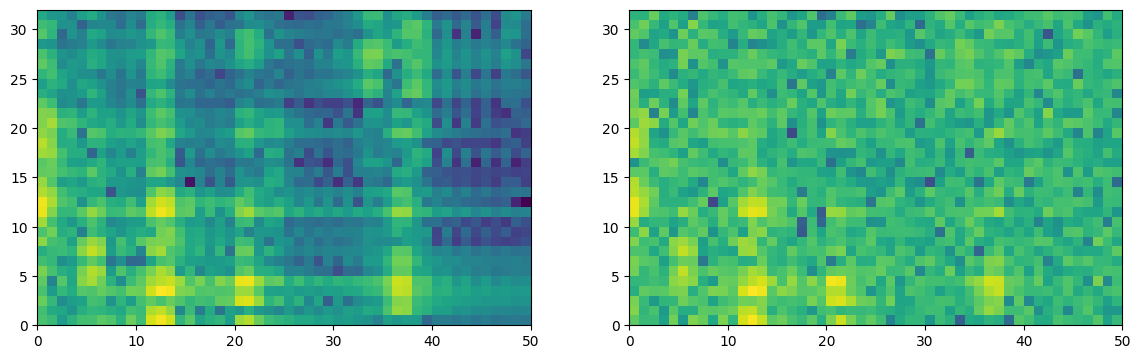

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,26))

x, y = np.meshgrid(delays, beams)
z_min = np.min(20*np.log10(np.abs(channel__beam_delay)))
z_max = np.max(20*np.log10(np.abs(channel__beam_delay)))
print(x.shape, y.shape, channel__beam_delay.shape)
c0 = axs[0].pcolormesh(x, y, 20*np.log10(np.abs(channel__beam_delay)), shading='flat', vmin=z_min, vmax=z_max)
c1 = axs[1].pcolormesh(x, y, 20*np.log10(np.abs(noisy_channel__beam_delay)), shading='flat', vmin=z_min, vmax=z_max)

axs[0].set_aspect('equal')
axs[1].set_aspect('equal')
fig.show()

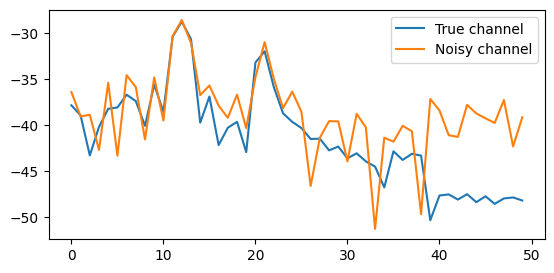

In [10]:
delays_1d = np.arange(0, channel__beam_delay.shape[1], 1)
plt.plot(delays_1d, 10*np.log10(np.abs(channel__beam_delay[0])), label='True channel')
plt.plot(delays_1d, 10*np.log10(np.abs(noisy_channel__beam_delay[0])), label='Noisy channel')

plt.gca().set_aspect('equal')
plt.legend()
plt.show()

## Nhiệm vụ: Biến đổi noisy_channel__beam_delay thành channel__beam_delay